In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
url = '/Users/danielleb./Documents/GitHub/unsupervised-machine-learning-challenge/Starter_Code/myopia.csv'

myopia = pd.read_csv(url)
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [13]:
#making a dataframe and droping the MYOPIA column 

df = pd.DataFrame(myopia)
df.drop('MYOPIC', axis=1, inplace=True)

df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [16]:
#standardized the dataset so the columns that contain larger values do not influence the outmore more than the smaller ner 
#this adds balance to the model 

scaler = StandardScaler()
features_standardized = scaler.fit_transform(myopia)

print(features_standardized)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  9.87137728e-01
   1.00324150e+00  2.57480672e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -1.01302987e+00
  -9.96768974e-01 -3.88378667e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.01302987e+00
  -9.96768974e-01 -3.88378667e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]]


In [19]:
#part 2: Perform dimensionality reduction with PCA

pca = PCA(n_components=0.95)
pca_transformed_data = pca.fit_transform(features_standardized)

print(pca_transformed_data)

[[ 0.78227012  0.89938285 -2.69739243 ...  0.25617625  1.83734811
  -0.57480397]
 [-0.61829974 -1.58621367 -0.63550601 ...  0.68372566 -0.38664636
   0.38369264]
 [-0.98659046 -0.65319681  1.41033532 ... -0.0915031   0.37060426
   0.12229395]
 ...
 [-0.91337537 -2.26245061  0.69924086 ...  0.81880064  0.19702234
  -0.0889197 ]
 [-1.16102511  0.46618323  0.33658992 ...  0.01810134 -1.09185289
   0.29757479]
 [-0.71156701 -0.72395984 -0.09371775 ...  0.12589922  0.89660384
  -0.31916993]]


In [21]:
#displaying how the numbers changeed 

print(pca.explained_variance_ratio_)

print(' we now have 12 features while components are set at 95%')

[0.19869153 0.14662762 0.09951898 0.07902771 0.0710028  0.06555091
 0.06171931 0.05989506 0.05316865 0.04913464 0.04465087 0.03587269]
 we now have 12 features while components are set at 95%


In [22]:
#reducing with t-SNE 

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

print(transformed_features)

/Users/danielleb./opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[[ 19.685213  -16.764908 ]
 [-16.939653  -11.786356 ]
 [ 11.200787    3.3168015]
 ...
 [-18.134827  -10.729087 ]
 [ 21.081205   -2.7502434]
 [-20.539917  -12.215978 ]]


In [23]:
transformed_features.shape

(618, 2)

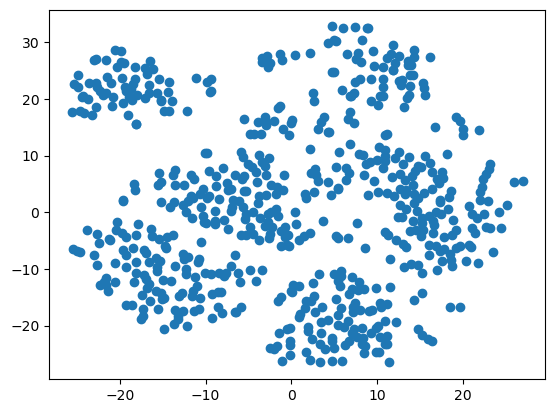

we can see there are 6 distinct clusters in the scatterplot


In [30]:
#create a scatter plit of the t-SNE output 

df["x"] = transformed_features[:,0]
df["y"] = transformed_features[:,1]
df["MYOPIC"] = myopia["MYOPIC"]

plt.scatter(df["x"], df["y"])
plt.show()

print("we can see there are 6 distinct clusters in the scatterplot")

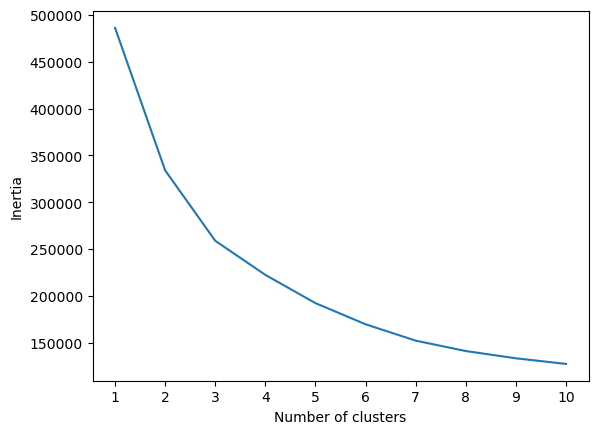

The elbow of the plot is at 3


In [35]:
#part 3 Perform a Cluster Analysis with K-means

inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)
    
    
    
graph_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(graph_data)   


plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11)) #have to end range at 11 because 10 would leave us at 9 for the number of clustesrs
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

print('The elbow of the plot is at 3')